Upload your dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving bengaluru_rides_100000.csv to bengaluru_rides_100000.csv


Then select your bengaluru_rides_100000.csv file from your computer.
Once uploaded, check file:

In [2]:
import pandas as pd
df = pd.read_csv('bengaluru_rides_100000.csv')
print(df.shape)
df.head()


(100000, 19)


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT_min,Avg_CTA T_min,Cancelled_By,Cancel_Reason,Cancelled_by_Driver_Flag,Incomplete_Ride_Flag,Incomplete_Ride_Reason,Booking_Value_INR,Ride_Distance_km,Driver_Rating,Customer_Rating
0,2025-09-07,00:18:43,8150ae2c-92ae-4b65-8701-0fa2216e56b8,Cancelled by Driver,CUST770487,Mini,Banashankari,Nagarjuna,NaN,NaN,Driver,Customer related issue,True,False,NaN,NaN,2.28,NaN,NaN
1,2025-09-20,11:40:11,bb1fe2ce-cad4-4fea-bfdd-0a6592c3558d,Cancelled by Customer,CUST216739,Auto,J P Nagar,Banashankari 2nd Stage,NaN,NaN,Customer,Wrong Address,False,False,NaN,NaN,7.47,NaN,NaN
2,2025-09-29,13:52:47,057fb1fb-9abc-4f13-b7e5-211b6eb9a08c,Successful,CUST126225,Prime Plus,Ulsoor,Electronic City,7.6,23.8,NaN,NaN,False,False,NaN,292.49,13.67,4.7,3.2
3,2025-09-15,04:04:10,1bd5cd12-2d61-480b-87d3-c53b5cbf9fe0,Incomplete,CUST877572,Prime SUV,Attibele,Dommasandra,NaN,NaN,NaN,NaN,False,True,Vehicle Breakdown,NaN,3.74,NaN,NaN
4,2025-09-11,17:34:50,a7ef6d15-4fc3-4378-8046-3fd32097c5da,Successful,CUST388389,Prime Sedan,Hosur Road,Kengeri,9.3,10.8,NaN,NaN,False,False,NaN,114.39,3.68,4.3,4.3


Clean column names

In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
df.columns.tolist()


['Date',
 'Time',
 'Booking_ID',
 'Booking_Status',
 'Customer_ID',
 'Vehicle_Type',
 'Pickup_Location',
 'Drop_Location',
 'Avg_VTAT_min',
 'Avg_CTA_T_min',
 'Cancelled_By',
 'Cancel_Reason',
 'Cancelled_by_Driver_Flag',
 'Incomplete_Ride_Flag',
 'Incomplete_Ride_Reason',
 'Booking_Value_INR',
 'Ride_Distance_km',
 'Driver_Rating',
 'Customer_Rating']

Convert Date & Time → datetime

In [4]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday'])
df[['datetime','hour','day_of_week','is_weekend']].head()


,datetime,hour,day_of_week,is_weekend
0,2025-09-07 00:18:43,0,Sunday,True
1,2025-09-20 11:40:11,11,Saturday,True
2,2025-09-29 13:52:47,13,Monday,False
3,2025-09-15 04:04:10,4,Monday,False
4,2025-09-11 17:34:50,17,Thursday,False


Convert numeric columns

In [6]:
num_cols = ['Avg_VTAT_min','Avg_CTA_T_min','Booking_Value_INR','Ride_Distance_km','Driver_Rating','Customer_Rating']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_VTAT_min,61929.0,7.010071,3.456321,1.0,4.50,7.00,9.40,22.50
Avg_CTA_T_min,61929.0,11.635008,5.470880,2.0,7.60,11.50,15.40,35.10
Booking_Value_INR,61929.0,88.520981,55.677652,20.0,46.58,76.07,114.58,640.18
Ride_Distance_km,100000.0,3.502847,3.013417,0.5,1.37,2.57,4.66,34.87
Driver_Rating,61929.0,4.347322,0.522228,1.8,4.00,4.40,4.80,5.00
Customer_Rating,61929.0,4.239179,0.607855,1.3,3.80,4.30,4.80,5.00


Add status flags

In [7]:
df['is_success'] = (df['Booking_Status'] == 'Successful').astype(int)
df['is_cancel_customer'] = (df['Booking_Status'] == 'Cancelled by Customer')
df['is_cancel_driver'] = (df['Booking_Status'] == 'Cancelled by Driver')
df['is_incomplete'] = (df['Booking_Status'] == 'Incomplete')
df[['Booking_Status','is_success']].head()


,Booking_Status,is_success
0,Cancelled by Driver,0
1,Cancelled by Customer,0
2,Successful,1
3,Incomplete,0
4,Successful,1


Booking Status Analysis

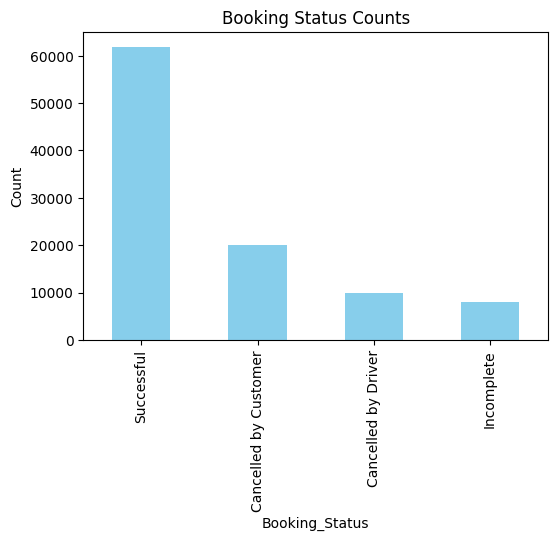

Success rate: 0.61929


In [8]:
import matplotlib.pyplot as plt

counts = df['Booking_Status'].value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color='skyblue')
plt.title('Booking Status Counts')
plt.ylabel('Count')
plt.show()

print("Success rate:", df['is_success'].mean())


Observation: should be around 62 % successful rides.

Vehicle Type & Top Pickup Areas

Vehicle_Type
Mini           19876
Bike           18119
Prime Sedan    17940
Auto           15144
Prime SUV      12024
Prime Plus     11915
eBike           4982
Name: count, dtype: int64


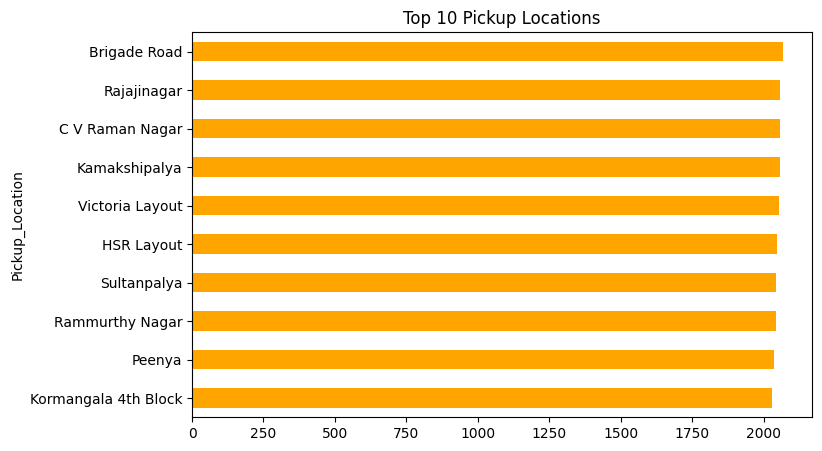

In [9]:
print(df['Vehicle_Type'].value_counts())
top10 = df['Pickup_Location'].value_counts().head(10)
top10.plot(kind='barh', figsize=(8,5), color='orange')
plt.title('Top 10 Pickup Locations')
plt.gca().invert_yaxis()
plt.show()


Demand Heatmap (day vs hour)

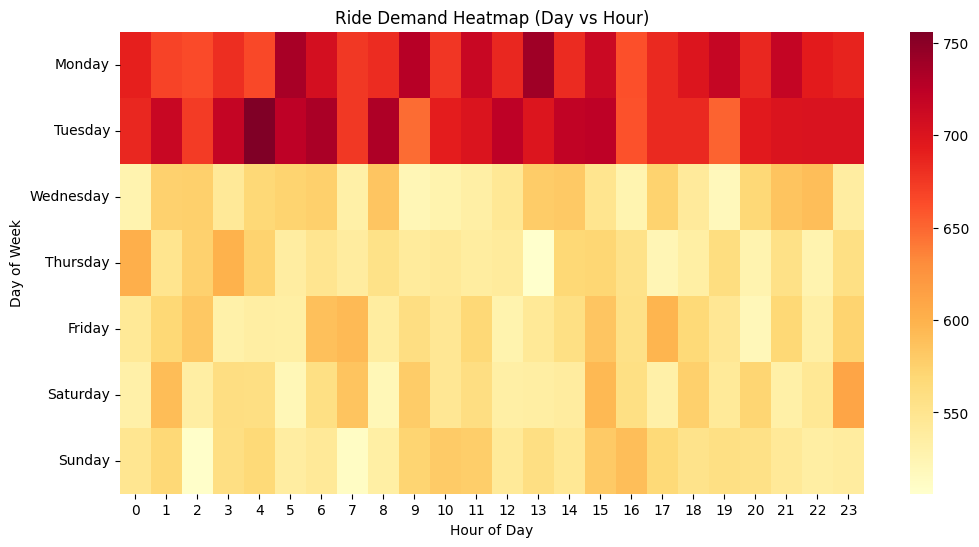

In [10]:
import seaborn as sns
pivot = df.pivot_table(index='day_of_week', columns='hour', values='Booking_ID', aggfunc='count').fillna(0)
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(order)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Ride Demand Heatmap (Day vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


VTAT & CTAT Distributions

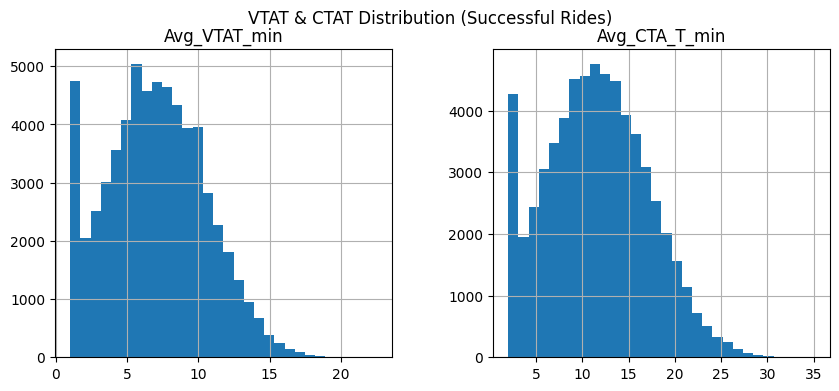

In [12]:
succ = df[df['is_success']==1]
succ[['Avg_VTAT_min','Avg_CTA_T_min']].hist(bins=30, figsize=(10,4))
plt.suptitle('VTAT & CTAT Distribution (Successful Rides)')
plt.show()

Cancellation Reasons

In [13]:
cust_reasons = df[df['is_cancel_customer']]['Cancel_Reason'].value_counts()
driver_reasons = df[df['is_cancel_driver']]['Cancel_Reason'].value_counts()

print("Customer Cancellation Reasons:\n", cust_reasons, "\n")
print("Driver Cancellation Reasons:\n", driver_reasons)


Customer Cancellation Reasons:
 Cancel_Reason
AC is not working (Only for 4-wheelers)         4066
Wrong Address                                   4063
Driver asked to cancel                          4039
Change of plans                                 4002
Driver is not moving towards pickup location    3958
Name: count, dtype: int64 

Driver Cancellation Reasons:
 Cancel_Reason
More than permitted people in there    2564
The customer was coughing/sick         2494
Personal & Car related issues          2493
Customer related issue                 2454
Name: count, dtype: int64


Fare vs Distance

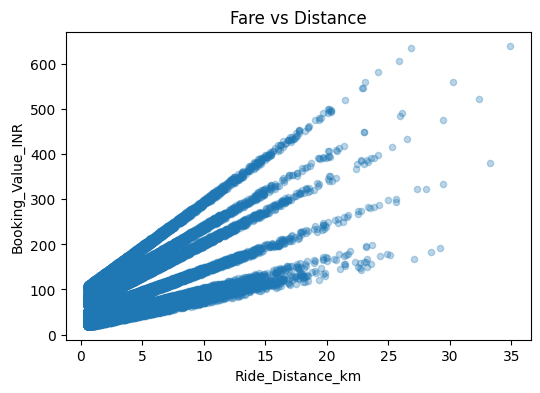

In [14]:
succ.plot(kind='scatter', x='Ride_Distance_km', y='Booking_Value_INR', alpha=0.3, figsize=(6,4))
plt.title('Fare vs Distance')
plt.show()


Ratings Analysis

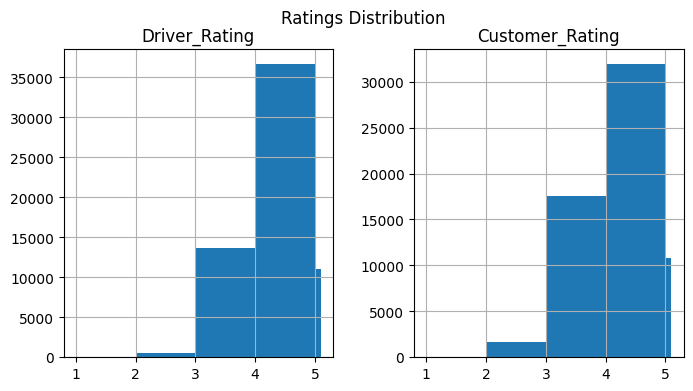

In [15]:
succ[['Driver_Rating','Customer_Rating']].hist(bins=[1,2,3,4,5,5.1], figsize=(8,4))
plt.suptitle('Ratings Distribution')
plt.show()


Correlation Matrix

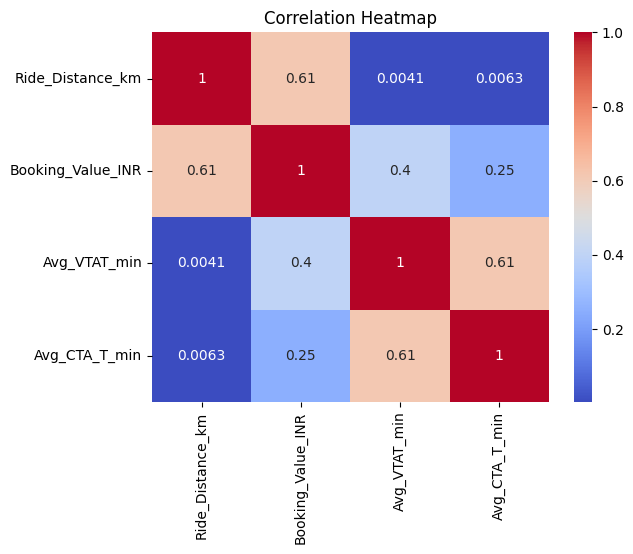

In [17]:
corr = succ[['Ride_Distance_km','Booking_Value_INR','Avg_VTAT_min','Avg_CTA_T_min']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations:

* Overall success rate ≈ 62 %.

* Peak hours around morning & evening.

* Most bookings from Koramangala, Whitefield, Indiranagar, etc.

* Main cancellation reasons: driver not moving to pickup & customer plan changes.

* Fare increases linearly with distance.

* Ratings generally high (> 4).